<img src='pic.png'>

## Table of Contents

* [Introduction](#Introduction)
* [Datasets Used](#Datasets Used)
* [Import Libraries](#Import Libraries)
* [Reading Data](#Reading Data)
* [1st Visualization : Riskier the loan, Higher the interest rate](#1st Visualization : Riskier the loan, Higher the interest rate)
    > [Insights](#i1)
* [2nd Visualization : Best 5 Loan Borrowing States](#2nd Visualization : Best 5 Loan Borrowing States)
   > [Insights](#i2)
* [3rd Visualization : Employee Title Analysis](#3rd Visualization : Employee Title Analysis)
   >[Insights](#i3)
* [Exploratory Data Analysis](#Exploratory Data Analysis)
     0. [Time series of count of loans per year per month](#Time series of count of loans per year per month)
     1. [Default Rate per Region (2007-2015)](#1. Default Rate per Region (2007-2015))
     2. [Default Rate per Grade (2007-2015)](#Default Rate per Grade (2007-2015))

## Introduction

[LendingClub](https://www.lendingclub.com) is the world’s leading online marketplace for connecting borrowers and investors. As explained by [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club),
>Lending Club enables borrowers to create unsecured personal loans between $1,000 - $40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

The objective of this project is to visualize the meaningful insights we get thorugh our analysis from the Lending club dataset under consideration. The dataset we analysed had loan data from 2007 through 2015. We have tried to identify the characterestics of loans given in different states all over the U.S. Another important aspect of this analysis was to identify the defaulter patterns

## Datasets Used

* [Lending Club Loan data](https://www.kaggle.com/husainsb/lendingclub-issued-loans#lc_loan.csv)

* [US Population by State](https://www.census.gov/data/datasets/2017/demo/popest/state-total.html)
   
* [US State Names](https://www.kaggle.com/husainsb/lendingclub-issued-loans#us-state-codes.csv)
   
* [US Regions](https://github.com/nikhilarosekuruvilla/Lending-Club-loan-analysis/blob/master/Region.csv)

## Import Libraries 

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set_context("poster")

## Reading Data

In [4]:
# Reading loan dataset
train=pd.read_csv("lc_loan.csv", low_memory=False)
print("Number of rows: " + str(train.shape[0])+", Number of Columns: "+ str(train.shape[1]))

Number of rows: 887379, Number of Columns: 74


In [5]:
# Reading US states dataset
us_states=pd.read_csv('us-state-codes.csv', low_memory=False)
us_states['state_code']=us_states.state_code.apply(lambda x: x[-2:])

In [6]:
# Reading Region information from dataset
region=pd.read_csv('Region.csv',low_memory=False)
region['State']=region.State.apply(lambda x: x.replace(' ',''))

In [7]:
# Reading US state wise population information
population = pd.read_csv("population.csv")
population['state']=population.state.apply(lambda x: x.replace(' ',''))

In [8]:
# Merge datasets to create final dataframe 'main_df'
main_df=train.merge(us_states, left_on='addr_state', right_on='state_code')
main_df=main_df.merge(region, left_on='state', right_on='State')
main_df=pd.merge(main_df, population, on='state')
main_df=main_df.drop(['state','addr_state'], axis=1)
main_df['issue_year']=main_df.issue_d.apply(lambda x: x[-4:]) # create 'issue year' column from 'loan issue date'
main_df['emp_title']=main_df.emp_title.str.lower()
main_df['Region']=main_df.Region.apply(lambda x: x.replace(' ',''))
main_df['Default']=main_df.loan_status.apply(lambda x: 1 if (x=='Default') |( x=='Charged Off') else 0)# create default variable
main_df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,state_code,State,Region,population,issue_year,Default
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,AZ,Arizona,WEST,7016270,2011,0
1,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,AZ,Arizona,WEST,7016270,2011,0
2,1070078,1305201,6500.0,6500.0,6500.0,60 months,14.65,153.45,C,C3,...,NaN,NaN,NaN,NaN,AZ,Arizona,WEST,7016270,2011,0


## 1st Visualization : Riskier the loan, Higher the interest rate

In [12]:
df=main_df.groupby(['grade','issue_year'], as_index=False)['int_rate'].mean()
trace0=go.Scatter(
    x=df.issue_year,
    y=df.int_rate[df.grade=='A'],
    mode='lines',
    name='grade_A'
)
trace1=go.Scatter(
    x=df.issue_year,
    y=df.int_rate[df.grade=='B'],
    mode='lines',
    name='grade_B'
)
trace2=go.Scatter(
    x=df.issue_year,
    y=df.int_rate[df.grade=='C'],
    mode='lines',
    name='grade_C'
)
trace3=go.Scatter(
    x=df.issue_year,
    y=df.int_rate[df.grade=='D'],
    mode='lines',
    name='grade_D'
)
trace4=go.Scatter(
    x=df.issue_year,
    y=df.int_rate[df.grade=='E'],
    mode='lines',
    name='grade_E'
)
trace5=go.Scatter(
    x=df.issue_year,
    y=df.int_rate[df.grade=='F'],
    mode='lines',
    name='grade_F'
)
trace6=go.Scatter(
    x=df.issue_year,
    y=df.int_rate[df.grade=='G'],
    mode='lines',
    name='grade_G'
)
layout=go.Layout(title="Average Interest Rate By Loan Grade (2007-2015)",
                 font=dict(size=18),
                 xaxis={'title':'Loan Issue Year',
                    'tickfont':dict(size=16)}, 
                 yaxis={'title':'Average interest rate',
                       'tickfont':dict(size=16)})
data=[trace0, trace1, trace2, trace3, trace4, trace5, trace6]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)  ## Riskier the loan higher the interest rate

In [13]:
# Creating dataframe of average interest rate by grade of loan
train_int_rate=main_df.groupby(['issue_year', 'grade'],as_index=False).agg({'int_rate':'mean'})
data_2008=train_int_rate[train_int_rate.issue_year=='2008'] 
data_2015=train_int_rate[train_int_rate.issue_year=='2015']
data_2008.index=['A', 'B', 'C', 'D', 'E', 'F', 'G']
data_2015.index=['A', 'B', 'C', 'D', 'E', 'F', 'G']
diff_int_rate=round(data_2015.int_rate-data_2008.int_rate, 3)

In [14]:
data=[go.Bar({
    'x':diff_int_rate.index,
    'y':diff_int_rate.values,  
    'marker':dict(
        color=['rgba(115, 244, 65,1)', 'rgba(115, 244, 65,0.8)',
               'rgba(244, 65, 98,1)', 'rgba(244, 65, 98,1)',
               'rgba(244, 65, 98,1)', 'rgba(244, 65, 98,1)', 
               'rgba(244, 65, 98,1)']),
    'opacity':1
})]
layout=go.Layout(title="Average change in interest rate by grade (2008-2015)",
                 font=dict(size=18),
                 xaxis={'title':'Grade of loan',
                    'tickfont':dict(size=16)}, 
                 yaxis={'title':'Change in interest rate',
                       'tickfont':dict(size=16)})
annotations=[]
for i in diff_int_rate.index:
    temp=diff_int_rate[i]
    if i not in ['A', 'B']:
        temp=diff_int_rate[i] + 1
    annotations.append(dict(x=i, y=temp-0.5, text=diff_int_rate[i],
                                font=dict(family='Arial', size=14,
                                color='rgba(0, 0, 102, 1)'),
                                showarrow=False,))
    
    layout['annotations']=annotations
fig=dict(data=data, layout=layout)
py.iplot(fig)

<a id="i1"></a>

### Insights
* Loan Grade represents default risk in order from 'A' to 'G' as low to high risk. As it can be seen from the graph interest rates remain higher for riskier loan grades.
* Also, over the years interest rates have increased with higher rates for loans in grade C,D,E,F,G. We think it could be due to 2008 _Recession_. 
* For least risky loans, grade- A,B the interest rates have remained pretty much steady and eventually came down.
    

## 2nd Visualization : Best 5 Loan Borrowing States

In [15]:
df=main_df.groupby(['state_code'], as_index=False).agg({'loan_amnt':'count', 'Default':'mean',\
                                                        'population':'mean','State':'unique'})
df['pct_loan_issued']=df.loan_amnt/df.loan_amnt.sum()*100.00

In [16]:
df.loan_amnt = df.loan_amnt.apply(lambda x: str(x))
df.population = df.population.apply(lambda x: str(x))
df['text'] =  df['State'] +'\n'+\
            'Average Loan Amount: '+ df.loan_amnt+ " "+ \
            'Population: '+ df.population 
data=[dict(
        type='choropleth',
        autocolorscale=True,
        colorbar=dict(
            title="% Loan Count"),
        locations=df['state_code'],
        z=df['pct_loan_issued'],
        locationmode='USA-states' ,
        text = df['text']
        )]
layout=dict(
        title='% Loans Issued per State (2007-2015)<br>(Hover for breakdown)',
        font=dict(size = 18),
        geo=dict(
            scope='usa',
            projection=dict(type='albers usa'),
            showlakes=True,
            lakecolor='rgb(255, 255, 255)')
             )    
fig=dict(data=data, layout=layout)
py.iplot(fig)

* As chart above shows more than 40% loans are issued to residents of _California, Newyork, Texas, Florida and Illinois_. Barely 500 loans combined are issued to residents of _Idaho, Iowa, North Dakota_ 
(supported by the tables below).

In [82]:
df.sort_values(by='loan_amnt',ascending=False).tail(5)

,state_code,loan_amnt,Default
29,NE,1176,0.003401
21,ME,525,0.000000
28,ND,479,0.000000
12,IA,14,0.071429
13,ID,12,0.083333


In [83]:
df.sort_values(by='loan_amnt',ascending=False).head(5)

,state_code,loan_amnt,Default
4,CA,129517,0.058239
34,NY,74086,0.057096
43,TX,71138,0.044224
9,FL,60935,0.059391
14,IL,35476,0.044255


In [80]:
# finding top 5 defaulter states
df.sort_values(by='Default',ascending=False).state_code.head(5).to_frame() 

,state_code
13,ID
12,IA
33,NV
11,HI
1,AL


In [17]:
# Creating dataframe to compare top 5 states to states with worst defaulter rates
df=main_df.groupby(['state_code'], as_index=False).agg({'loan_amnt':'count','Default':'mean'})
ten_states = ['CA','NY','TX','FL','IL','ID','IA','NV','HI','AL'] 
train_state = df[df.state_code.isin(ten_states)]
train_state.Default = train_state.Default*100
train_state = train_state.sort_values(by='Default',ascending=False)

In [18]:
trace1 = go.Scatter(
    x= train_state.state_code,
    y= train_state.Default,
    yaxis='y2',
    name = 'Default Rate'
)
trace2 = go.Bar(
    x= train_state.state_code,
    y= train_state.loan_amnt,
    name = 'No.of Loans'
)

data = [trace1, trace2]
layout = go.Layout(
    title ='Default Rate & No.of Loans vs States',
    font  = dict(size = 18),
    yaxis = dict(
        title='No.of Loans'
    ),
    yaxis2=dict(
        title='Default rate',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right'
    ),
    xaxis = dict(
        title = 'State'),
    legend=dict(orientation="h")
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

* One observation that stands out is that borrowers residing in top 5 loan borrowing states don't have exceptionally high default rate. 
* Borrowers residing in _Idaho, Iowa, Nevada, Hawaii and Alabama_ have the higher default rates. Borrowers from _Maine, North Dakota, Nebraska_ have the lowest default rates.

<a id="i2"></a>

### Insights
* There is no clear indication that states with highest number of loans borrowed _e.g. California_ have the tendency to default more compared to borrowers of other states.
* The perception of higher defaults in _California, New York, Texas, Florida, Illinois_  can be maily due to higher population size of these advanced states. Thus, even though the top five borrowing states have highest number of defaults, it is not compulsively because of higher default rates.

## 3rd Visualization : Employee Title Analysis

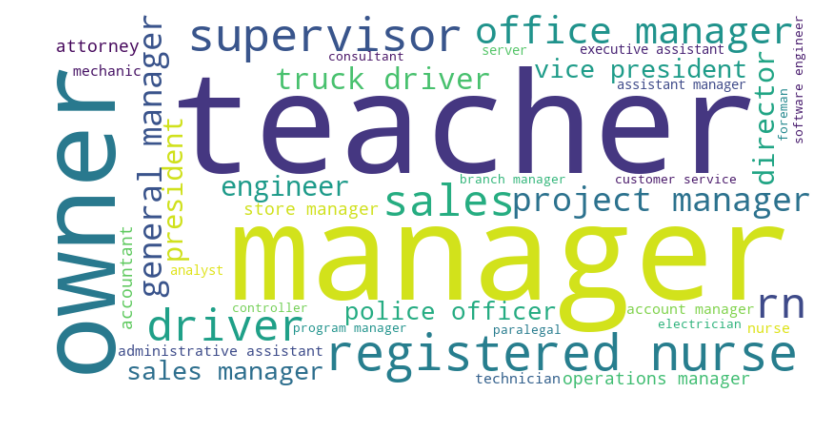

In [9]:
emp_cloud=main_df.emp_title.value_counts()[:40]
emp_cloud=emp_cloud.to_frame().reset_index()
d={}
for a, x in emp_cloud.values:
    d[a]=x
wordcloud=WordCloud(background_color='white',min_font_size=9, width=800,height=400)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();

<a id="i3"></a>

### Insights
* The above word cloud shows the top 40 employment titles for loans issued between 2007-2015. It seems borrowers with title Teachers and Managers take loans more often compared to other borrowers.

## Exploratory Data Analysis

### Time series of count of loans per year per month

In [19]:
# Creating dataframe with count of loans per month
train['issue_year']=train.issue_d.str.split("-").apply(lambda x: x[1])
train['issue_month']=train.issue_d.str.split("-").apply(lambda x: x[0])
ts_count_month=train.groupby(["issue_year", "issue_month"])['id'].count().to_frame().reset_index()
ts_count_month=ts_count_month.pivot(index=ts_count_month.issue_year, columns='issue_month')['id']
# Creating ordered categories for months
months=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
ts_count_month=ts_count_month.reindex(pd.Categorical(
                    ts_count_month.columns, categories=months, ordered=True).sort_values(), axis=1)

In [20]:
data=[{
    'x':ts_count_month.index,
    'y':ts_count_month[col],
    'name':col,
    'opacity':1,
  }for col in ts_count_month.columns]
layout=go.Layout(title="Time series of count of loans per year per month",
                 font=dict(size=18),
                 xaxis={'title':'Year',
                    'tickfont':dict(size=16)}, 
                 yaxis={'title':'Count of loans',
                       'tickfont':dict(size=16)})
fig=dict(data=data, layout=layout)
py.iplot(fig)

##### Although pretty much year on year the loan amount is increasing every month, month wise seasonality can be clearly seen post 2012.

### Default Rate per Region (2007-2015)

In [21]:
df=main_df.groupby(['Region','issue_year'],as_index=False)['Default'].mean()

In [22]:
trace0=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.Region=='SOUTH'],
    mode='lines',
    name='South'
)

trace1=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.Region=='WEST'],
    mode='lines',
    name='West'
)

trace2=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.Region=='NORTHEAST'],
    mode='lines',
    name='NorthEast'
)

trace3=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.Region=='MIDWEST'],
    mode='lines',
    name='MidWest'
)
layout=go.Layout(title="% Default Rate per Region (2007-2015)",
                 font=dict(size=18),
                 xaxis={'title':'Loan Issue Year',
                    'tickfont':dict(size=16)}, 
                 yaxis={'title':'% Default Rate',
                       'tickfont':dict(size=16)})
data=[trace0, trace1, trace2, trace3]
fig=dict(data=data, layout=layout)
py.iplot(fig) 

#### West Region has Highest Default rate till 2011, Post which it pretty much converges for each State.


### Default Rate per Grade (2007-2015)

In [23]:
df=main_df.groupby(['grade','issue_year'],as_index=False)['Default'].mean()

In [24]:
trace0=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.grade=='A'],
    mode='lines',
    name='grade_A'
)
trace1=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.grade=='B'],
    mode='lines',
    name='grade_B'
)
trace2=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.grade=='C'],
    mode='lines',
    name='grade_C'
)
trace3=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.grade=='D'],
    mode='lines',
    name='grade_D'
)
trace4=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.grade=='E'],
    mode='lines',
    name='grade_E'
)
trace5=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.grade=='F'],
    mode='lines',
    name='grade_F'
)
trace6=go.Scatter(
    x=df.issue_year,
    y=df.Default[df.grade=='G'],
    mode='lines',
    name='grade_G'
)
layout=go.Layout(title="% Default Rate per Grade (2007-2015)",
                 font=dict(size=18),
                 xaxis={'title':'Loan Issue Year',
                    'tickfont':dict(size=16)}, 
                 yaxis={'title':'% Default Rate',
                       'tickfont':dict(size=16)})
data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
fig = dict(data=data, layout=layout)
py.iplot(fig) 

#### Higher Loan Grade have higher default rates pretty much every year. However, Default Rate Converges After 2012 regardless of Loan Grade?


### Number of Public Records Vs. Number of Loans Issued

In [25]:
df=main_df.groupby('pub_rec', as_index=False)['loan_amnt'].count()
trace0=go.Bar(
    x=df.pub_rec,
    y=df.loan_amnt
)
layout=go.Layout(title="Number of Public Records Vs. Number of Loans Issued<br>(Hover for breakdown)",
                 font=dict(size=18),
                 xaxis=dict(title='Loan Issued in Year',
                    tickfont=dict(size=16), range=[0,10]), 
                 yaxis={'title':'Count of loans',
                       'tickfont':dict(size=16)
                       })
data=[trace0]
fig=dict(data=data, layout=layout)
py.iplot(fig) 

#### Public Records drastically reduce the chance to borrow loans.